In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\hh\appdata\roaming\python\python312\site-packages\diamondpriceprediction-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import yfinance as yf

start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'  

data = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3259,2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
3260,2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400


In [6]:
ma_100_days= data.Close.rolling(100).mean()

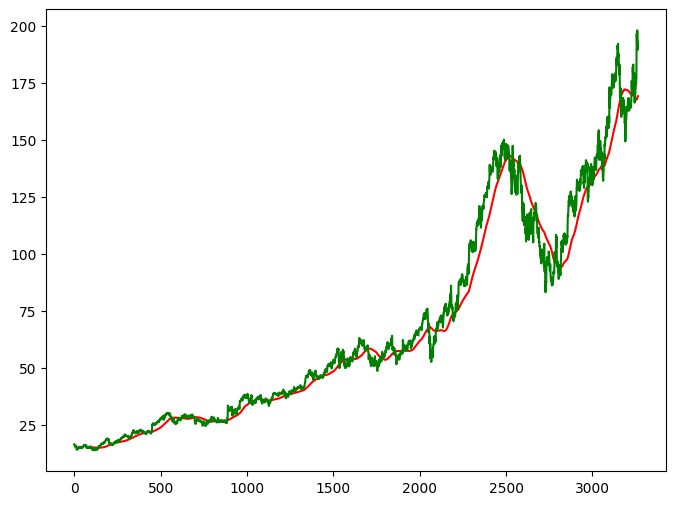

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

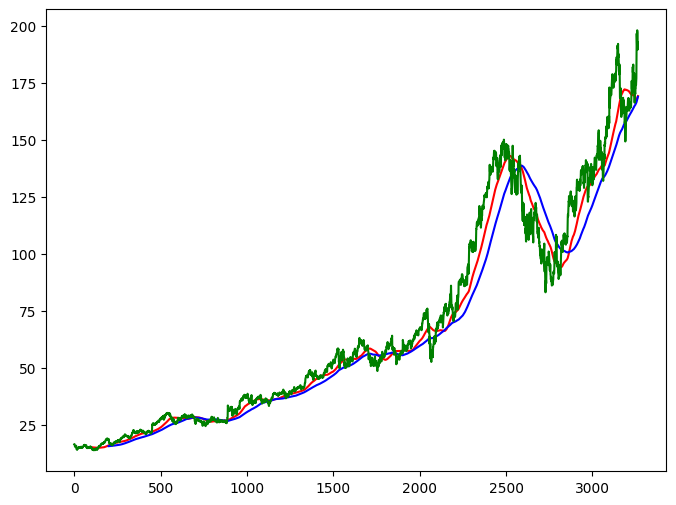

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2611

In [13]:
data_test.shape[0]

653

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x , y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\hh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size=32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - loss: 0.0437
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0046
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0049
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0044
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0042
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0035
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0034
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0028
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0026
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0025
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0025
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - loss: 0.0029
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0023
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test

Ticker,GOOG
0,146.615707
1,147.533875
2,145.923676
3,145.979980
4,145.479782
...,...
748,198.160004
749,197.119995
750,190.149994
751,189.699997


In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [29]:
y_predict

array([[0.28419754],
       [0.28147447],
       [0.27888668],
       [0.27624136],
       [0.2734779 ],
       [0.27045798],
       [0.2671524 ],
       [0.2637145 ],
       [0.26047543],
       [0.2576373 ],
       [0.25526854],
       [0.253492  ],
       [0.25232375],
       [0.2517675 ],
       [0.25180134],
       [0.2524943 ],
       [0.2538797 ],
       [0.25568232],
       [0.25735208],
       [0.25843626],
       [0.25875297],
       [0.2582469 ],
       [0.2570614 ],
       [0.25560075],
       [0.2540741 ],
       [0.2526182 ],
       [0.25144437],
       [0.25069785],
       [0.2503567 ],
       [0.25032637],
       [0.2504472 ],
       [0.25057173],
       [0.2506682 ],
       [0.2507779 ],
       [0.25104928],
       [0.25172698],
       [0.25298065],
       [0.25484473],
       [0.25700465],
       [0.25907803],
       [0.2607934 ],
       [0.26190957],
       [0.2624359 ],
       [0.26251078],
       [0.2623175 ],
       [0.2617999 ],
       [0.26088375],
       [0.259

In [30]:
scaler.scale_

array([0.008698])

In [31]:
scale = 1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

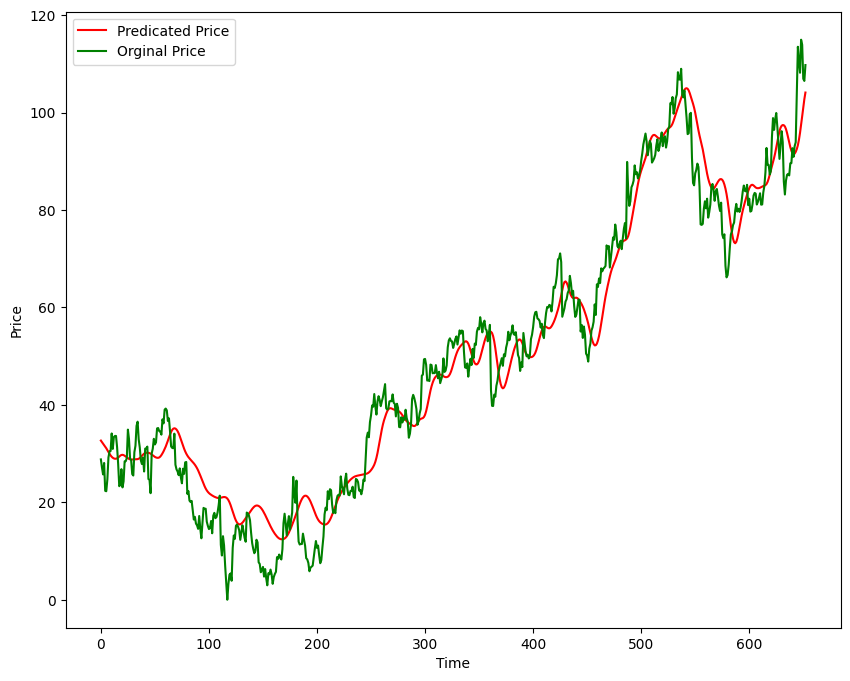

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label ='Predicated Price')
plt.plot(y, 'g', label = 'Orginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Stock Predictions Model.keras')